## Task4

Importo dati di train

In [129]:
import os
import pandas as pd

path_dataframes = os.path.join("..", "dataset", "dataframes")
file_path = os.path.join(path_dataframes, "train_data_aggregated.pkl")
df_train_task4_aggregated= pd.read_pickle(file_path)

print(df_train_task4_aggregated.info())
df_train_task4_aggregated.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 106 entries, Spacecraft to Case
dtypes: float64(91), int64(6), object(9)
memory usage: 146.7+ KB
None


,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,...,P7_time_variance,P7_time_line_integral,P7_time_min,P7_time_max,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Case
0,1,Normal,100,100,100,100,No,No,No,No,...,0.329054,2366.012724,-0.003006,5.017115,47260.680479,64.945878,237314.084554,2632.685347,19.887772,1
1,1,Normal,100,100,100,100,No,No,No,No,...,0.335404,2366.376508,-0.003786,4.999330,47662.864823,64.945878,241893.822061,2688.225229,20.078754,2
2,1,Normal,100,100,100,100,No,No,No,No,...,0.353392,2368.725329,-0.007141,5.000936,46019.998152,64.945878,254866.442384,2743.060363,20.610129,3
3,1,Normal,100,100,100,100,No,No,No,No,...,0.321221,2365.701657,-0.002395,5.008294,46367.986582,64.945878,231664.969366,2565.994380,19.649638,4
4,1,Normal,100,100,100,100,No,No,No,No,...,0.324006,2366.740718,-0.002607,4.998044,46805.662115,64.945878,233673.009183,2592.227655,19.734615,5


Filtro le righe in cui la condizione è Fault

In [130]:
import numpy as np
import os

# Filtrare solo le righe in cui Condition è 'Fault'
df_train_task4_aggregated = df_train_task4_aggregated[df_train_task4_aggregated['Condition'] == 'Fault'].copy()

# Dizionario per mappare i sensori sulle classi numeriche
column_to_number = {'SV1': 1, 'SV2': 2, 'SV3': 3, 'SV4': 4}

# Creazione della colonna target con un solo valore numerico
df_train_task4_aggregated['fault_location'] = df_train_task4_aggregated[column_to_number.keys()].apply(
    lambda row: next((column_to_number[col] for col in column_to_number.keys() if row[col] != 100), np.nan),
    axis=1
)

# Salvaggio del dataset filtrato con target aggiornato
df_train_task4_aggregated.to_csv(os.path.join(path_dataframes, "dataset_train_task4_with_target.csv"), index=False)

# Mostrare alcune righe per conferma
print(df_train_task4_aggregated[['Condition', 'SV1', 'SV2', 'SV3', 'SV4', 'fault_location']].head())


    Condition  SV1  SV2  SV3  SV4  fault_location
105     Fault    0  100  100  100               1
106     Fault   25  100  100  100               1
107     Fault   50  100  100  100               1
108     Fault   75  100  100  100               1
109     Fault  100    0  100  100               2


Rimuovo colonne non necessarie

In [131]:
# Lista delle colonne da rimuovere (puoi modificarla manualmente se necessario)
cols_to_remove = ['Spacecraft','BP1','BP2','BP3','BP4','BP5','BP6', 'BP7', 'BV1','SV1','SV2','SV3','SV4','anomaly_location']

# Rimuovere le colonne specificate
df_train_task4_aggregated = df_train_task4_aggregated.drop(columns=cols_to_remove, errors='ignore')

# Stampare le colonne rimanenti per verifica
print(f"Colonne rimanenti dopo la pulizia: {df_train_task4_aggregated.columns}")


Colonne rimanenti dopo la pulizia: Index(['Condition', 'P1_time_mean', 'P1_time_median', 'P1_time_p25',
       'P1_time_p75', 'P1_time_variance', 'P1_time_line_integral',
       'P1_time_min', 'P1_time_max', 'P1_freq_peak_value', 'P1_freq_peak_freq',
       'P1_freq_sum_power_spectrum', 'P1_freq_std_power_spectrum',
       'P1_freq_rms_freq', 'P2_time_mean', 'P2_time_median', 'P2_time_p25',
       'P2_time_p75', 'P2_time_variance', 'P2_time_line_integral',
       'P2_time_min', 'P2_time_max', 'P2_freq_peak_value', 'P2_freq_peak_freq',
       'P2_freq_sum_power_spectrum', 'P2_freq_std_power_spectrum',
       'P2_freq_rms_freq', 'P3_time_mean', 'P3_time_median', 'P3_time_p25',
       'P3_time_p75', 'P3_time_variance', 'P3_time_line_integral',
       'P3_time_min', 'P3_time_max', 'P3_freq_peak_value', 'P3_freq_peak_freq',
       'P3_freq_sum_power_spectrum', 'P3_freq_std_power_spectrum',
       'P3_freq_rms_freq', 'P4_time_mean', 'P4_time_median', 'P4_time_p25',
       'P4_time_p75', 'P4_

Info dataframe

In [132]:
# Verificare le informazioni sul DataFrame
df_train_task4_aggregated.info()

# Stampare i valori unici nella colonna 'fault_location' per controllare i dati
print(df_train_task4_aggregated['fault_location'].unique())

# Stampare i primi valori per un controllo visivo
print(df_train_task4_aggregated[['fault_location']].head())

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 105 to 152
Data columns (total 94 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Condition                   48 non-null     object 
 1   P1_time_mean                48 non-null     float64
 2   P1_time_median              48 non-null     float64
 3   P1_time_p25                 48 non-null     float64
 4   P1_time_p75                 48 non-null     float64
 5   P1_time_variance            48 non-null     float64
 6   P1_time_line_integral       48 non-null     float64
 7   P1_time_min                 48 non-null     float64
 8   P1_time_max                 48 non-null     float64
 9   P1_freq_peak_value          48 non-null     float64
 10  P1_freq_peak_freq           48 non-null     float64
 11  P1_freq_sum_power_spectrum  48 non-null     float64
 12  P1_freq_std_power_spectrum  48 non-null     float64
 13  P1_freq_rms_freq            48 non-null

Feature Importance ANOVA

C:\Users\kikop\AppData\Local\Temp\ipykernel_10128\2168760732.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_task4_aggregated['fault_location'].fillna(-1, inplace=True)  # -1 indica nessun fault


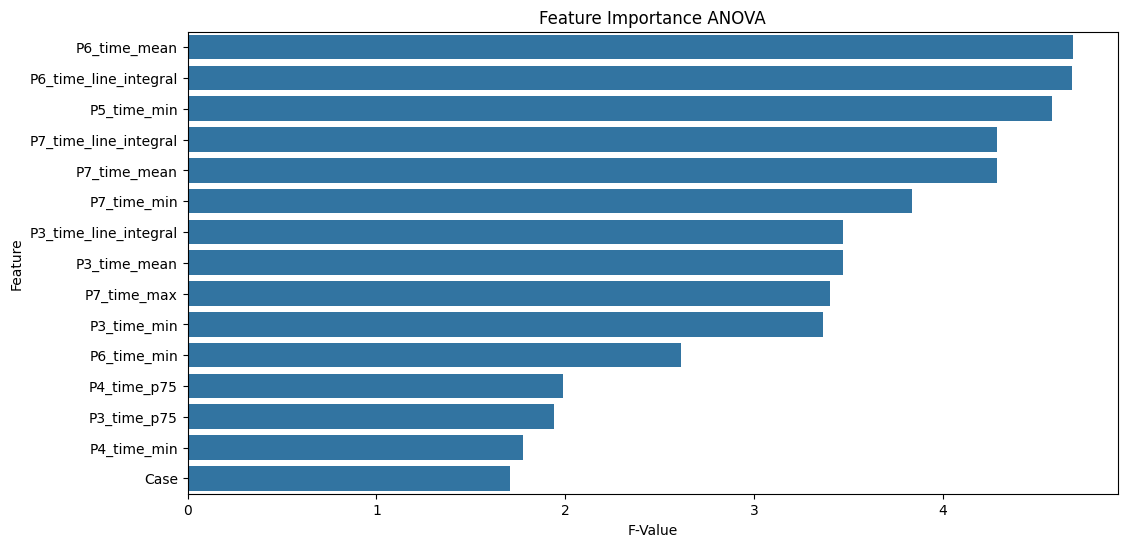

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import f_classif

# Assicurati che 'fault_location' sia numerico
df_train_task4_aggregated['fault_location'] = pd.to_numeric(df_train_task4_aggregated['fault_location'], errors='coerce')

# Controlla se ci sono valori NaN e sostituiscili con un valore valido (opzionale)
df_train_task4_aggregated['fault_location'].fillna(-1, inplace=True)  # -1 indica nessun fault


# Separazione delle feature dal target
X = df_train_task4_aggregated.drop(columns=['Condition', 'fault_location'])
y = df_train_task4_aggregated['fault_location']

# Calcolo del valore F di ANOVA
f_values, p_values = f_classif(X, y)

# Creazione di un DataFrame con i risultati
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'P-Value': p_values})
anova_results = anova_results.sort_values(by='F-Value', ascending=False)

# Visualizzazione delle feature più importanti
plt.figure(figsize=(12, 6))
sns.barplot(x='F-Value', y='Feature', data=anova_results[:15])
plt.title('Feature Importance ANOVA')
plt.show()


Feature Importance Chi2

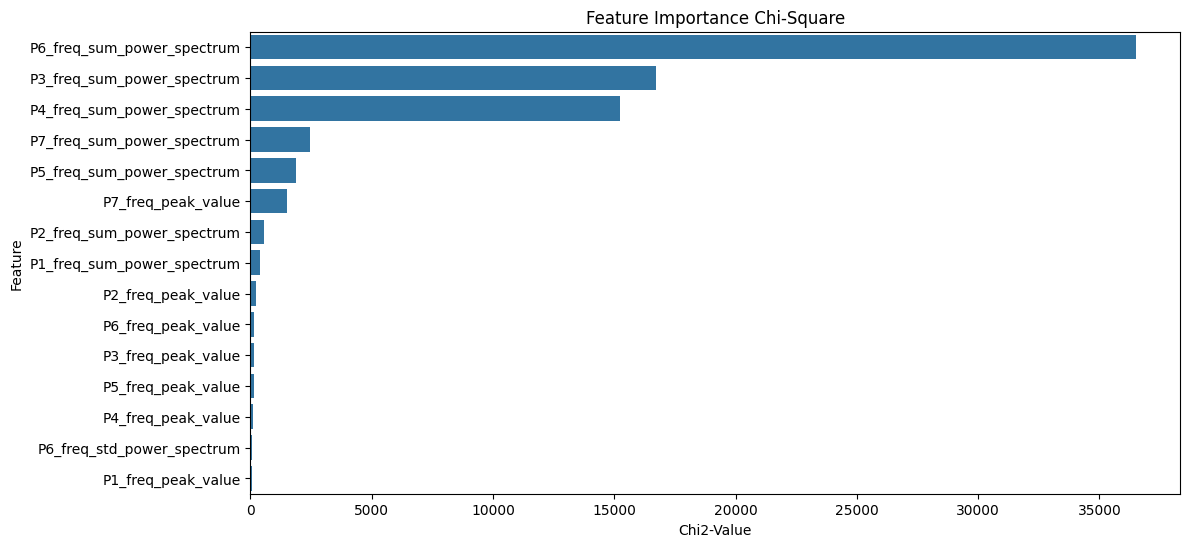

In [134]:
from sklearn.feature_selection import chi2
import numpy as np

# Normalizzazione delle feature per Chi2 (richiede solo valori positivi)
X_chi2 = X - np.min(X) + 1  # Shift per evitare valori negativi
y_chi2 = y

# Calcolo del valore Chi2
chi2_values, chi2_p_values = chi2(X_chi2, y_chi2)

# Creazione di un DataFrame con i risultati
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2-Value': chi2_values, 'P-Value': chi2_p_values})
chi2_results = chi2_results.sort_values(by='Chi2-Value', ascending=False)

# Visualizzazione delle feature più importanti
plt.figure(figsize=(12, 6))
sns.barplot(x='Chi2-Value', y='Feature', data=chi2_results[:15])
plt.title('Feature Importance Chi-Square')
plt.show()


Unisco ed uso per il train le migliori feature in output dai due modelli

In [135]:
# Unire le feature più importanti di ANOVA e Chi2
top_features_anova = anova_results[:15]['Feature'].tolist()
top_features_chi2 = chi2_results[:15]['Feature'].tolist()

# Creare una lista unica delle feature selezionate
selected_features = list(set(top_features_anova + top_features_chi2))

# Numero di feature utilizzate per l'addestramento
num_features = len(selected_features)
print(f"Numero di feature utilizzate per il training: {num_features}")

# Visualizzare le feature selezionate
print("Feature selezionate:", selected_features)

# Creare il dataset con le feature selezionate
df_selected = df_train_task4_aggregated[selected_features + ['fault_location']]
df_selected

Numero di feature utilizzate per il training: 30
Feature selezionate: ['P2_freq_sum_power_spectrum', 'P3_freq_sum_power_spectrum', 'P4_freq_sum_power_spectrum', 'P5_time_min', 'P7_time_min', 'P6_freq_peak_value', 'P1_freq_peak_value', 'P3_freq_peak_value', 'P3_time_mean', 'P5_freq_sum_power_spectrum', 'P6_time_min', 'P4_time_p75', 'P1_freq_sum_power_spectrum', 'P3_time_min', 'P4_freq_peak_value', 'P3_time_p75', 'P4_time_min', 'P7_time_line_integral', 'P2_freq_peak_value', 'Case', 'P6_time_mean', 'P7_time_max', 'P6_time_line_integral', 'P3_time_line_integral', 'P6_freq_sum_power_spectrum', 'P6_freq_std_power_spectrum', 'P5_freq_peak_value', 'P7_time_mean', 'P7_freq_sum_power_spectrum', 'P7_freq_peak_value']


,P2_freq_sum_power_spectrum,P3_freq_sum_power_spectrum,P4_freq_sum_power_spectrum,P5_time_min,P7_time_min,P6_freq_peak_value,P1_freq_peak_value,P3_freq_peak_value,P3_time_mean,P5_freq_sum_power_spectrum,...,P7_time_max,P6_time_line_integral,P3_time_line_integral,P6_freq_sum_power_spectrum,P6_freq_std_power_spectrum,P5_freq_peak_value,P7_time_mean,P7_freq_sum_power_spectrum,P7_freq_peak_value,fault_location
105,96277.658901,139357.292765,168937.641840,0.109037,-0.000892,30464.533698,7825.968237,22401.023273,1.990400,119719.595147,...,5.024811,2367.446448,2388.441300,178757.535148,1854.574849,22051.677819,1.975697,188259.795984,30854.698537,1
106,147514.199141,180004.646281,217916.894204,0.005613,-0.002196,40902.267279,10964.480139,30843.048410,1.977205,162705.725963,...,5.134264,2360.993754,2372.578495,235784.900766,2477.267776,31034.088967,1.971982,235899.122421,45735.930228,1
107,138936.255341,180273.007039,211904.127455,0.000444,-0.002278,41030.060747,11055.424309,31738.774896,1.974826,161770.340969,...,5.061238,2355.309132,2369.719206,240814.882495,2522.298005,30969.043366,1.970523,237706.006104,44520.555825,1
108,142702.317979,181480.058975,209599.357131,-0.001029,-0.002584,41648.181387,11070.769992,32097.777198,1.973780,162734.540644,...,5.029750,2358.137468,2368.462210,241734.276710,2527.273160,31060.159001,1.971662,237018.764171,46638.531350,1
109,96655.766423,136955.335094,155507.066766,-0.001804,-0.001875,30319.953369,7794.772183,23589.683885,1.983286,119250.841815,...,5.064965,2365.822182,2379.897834,180525.964282,1850.580057,22536.019444,1.976816,185539.942404,31975.322168,2
110,139934.277606,184987.858749,197760.805178,-0.001217,-0.002360,40842.640283,10993.095460,31556.369652,1.972478,164555.742907,...,5.064180,2361.180164,2366.905911,236256.120842,2470.066024,31034.584220,1.971533,233758.149031,45797.782484,2
111,144514.477135,184453.626573,200468.965898,-0.001493,-0.002412,40699.933455,11077.970119,31927.894021,1.972651,162667.044092,...,5.018891,2365.200735,2367.109822,239718.703406,2489.764508,30750.038246,1.970705,233367.605188,46096.799339,2
112,143009.926702,184449.550044,211900.406760,-0.001674,-0.005543,40879.465778,11100.258800,32093.644675,1.972690,163858.473858,...,5.007075,2354.810279,2367.154101,239065.839569,2507.023648,31127.161587,1.974242,247316.029953,48767.234829,2
113,100769.270113,139447.958073,159770.901425,0.233774,-0.000203,29364.386685,7411.930032,22129.524001,1.979604,105425.286071,...,4.912927,2382.786647,2375.465438,171218.914950,1757.681935,21288.222657,1.981634,207484.202741,32913.385279,3
114,143528.369616,185624.736323,207680.183768,0.006353,0.008186,40657.153799,11006.082354,31903.663497,1.972549,160269.689404,...,4.954064,2370.695901,2366.984473,215571.964341,2371.234890,30537.281644,1.969928,244310.389655,44352.078396,3


Sovracampiono il dataset di train

C:\Users\kikop\AppData\Local\Temp\ipykernel_10128\3389480522.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_selected.groupby('fault_location', group_keys=False).apply(
C:\Users\kikop\AppData\Local\Temp\ipykernel_10128\3389480522.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_balanced['fault_location'], palette="viridis")


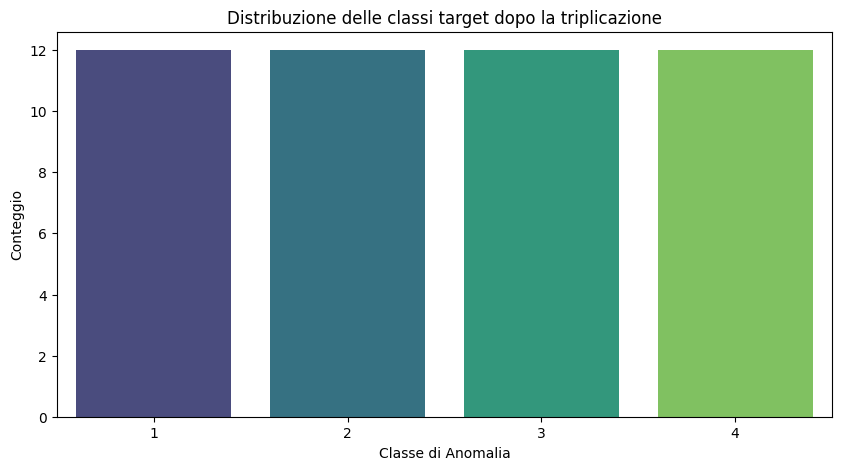

In [136]:
import pandas as pd
from sklearn.utils import resample

# Sovra-campionamento per ottenere un dataset bilanciato
df_balanced = df_selected.groupby('fault_location', group_keys=False).apply(
    lambda x: resample(x, replace=True, n_samples=df_selected['fault_location'].value_counts().max(), random_state=42)
).reset_index(drop=True)

# Salvataggio del dataset aumentato
df_balanced.to_csv(os.path.join(path_dataframes, "dataset_train_task4_triplicated.csv"), index=False)

# Controllo distribuzione dopo l'aumento
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x=df_balanced['fault_location'], palette="viridis")
plt.title("Distribuzione delle classi target dopo la triplicazione")
plt.xlabel("Classe di Anomalia")
plt.ylabel("Conteggio")
plt.show()


Divisione in train e test

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separazione feature e target
X = df_balanced.drop(columns=['fault_location'])
y = df_balanced['fault_location']

# Suddivisione in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalizzazione delle feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Addestramento modello

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Creazione e addestramento del modello
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predizione sul test set
y_pred = clf.predict(X_test_scaled)

# Report delle prestazioni
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[3 0 0 1]
 [0 2 0 1]
 [0 0 4 0]
 [0 0 0 4]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         4
           4       0.67      1.00      0.80         4

    accuracy                           0.87        15
   macro avg       0.92      0.85      0.86        15
weighted avg       0.91      0.87      0.87        15



In [139]:
import pickle

# Salvare il modello con il nome anomaly_locations.pkl
with open("fault_locations.pkl", "wb") as f:
    pickle.dump(clf, f)

Estraggo i casi di fault in uscita dal Task 2

In [140]:
# Caricare il dataset di test con le predizioni
df_test = pd.read_csv("../dataset/dataframes/test_data_output_task2.csv")

# Estrarre gli indici dei Case con Predicted_Condition == "Anomaly"
fault_cases = df_test[df_test["Predicted_Condition"] == "Fault"]["Case"].tolist()
print("Casi predetti come Fault in Output dal Task2:", fault_cases)

Casi predetti come Fault in Output dal Task2: [179, 188, 190, 193, 202, 211, 212, 214, 216]


Carico dataset di test originale, filtrando solo per casi fault

In [141]:
# Caricare il dataset delle feature originali
df_test_aggregated = pd.read_csv("../dataset/dataframes/test_data_aggregated.csv")

# Filtrare solo le righe che corrispondono agli 8 Case previsti come Anomaly
df_test_fault_features = df_test_aggregated[df_test_aggregated["Case"].isin(fault_cases)].copy()

# Verificare che il numero di righe filtrate sia esattamente 8
print(f"Numero di righe filtrate per Anomaly: {df_test_fault_features.shape[0]}")

Numero di righe filtrate per Anomaly: 9


In [142]:
# Filtrare il dataset di test utilizzando le stesse feature
X_test_filtered = df_test_fault_features[selected_features]
print(f"Numero di campioni filtrati per il test: {X_test_filtered.shape[0]}")
print(X_test_filtered.head())

Numero di campioni filtrati per il test: 9
    P2_freq_sum_power_spectrum  P3_freq_sum_power_spectrum  \
1                139440.980383               187540.084844   
10               142170.158058               204277.771571   
12               143811.168488               186862.059159   
15               137404.314915               177254.112328   
24               150753.945102               210768.042048   

    P4_freq_sum_power_spectrum  P5_time_min  P7_time_min  P6_freq_peak_value  \
1                202317.823081    -0.001314    -0.002775        40848.739674   
10               244219.510060     0.024180    -0.001705        40058.539055   
12               208161.702759     0.017505     0.011023        42346.362544   
15               198781.726242     0.000563     0.000599        36218.345696   
24               246020.707780     0.001609     0.000629        41553.674559   

    P1_freq_peak_value  P3_freq_peak_value  P3_time_mean  \
1         10976.103217        31444.371836 

In [143]:
# Caricare il modello salvato
with open("fault_locations.pkl", "rb") as f:
    clf_loaded = pickle.load(f)

# Applicare la stessa normalizzazione usata nel training
X_test_scaled = scaler.transform(X_test_filtered)

# Effettuare la predizione sul dataset normalizzato
y_pred_anomaly = clf_loaded.predict(X_test_scaled)

# Creare un DataFrame con le predizioni
df_predictions = pd.DataFrame({
    "Case": df_test_fault_features["Case"],
    "Predicted_Fault_Location": y_pred_anomaly
})

print(df_predictions)


    Case  Predicted_Fault_Location
1    179                         1
10   188                         4
12   190                         3
15   193                         2
24   202                         3
33   211                         2
34   212                         2
36   214                         4
38   216                         2


In [144]:
# Salviamo il df delle predizioni in formato CSV e Pickle
df_predictions.to_csv("../dataset/dataframes/test_data_output_task4.csv", index=False)
df_predictions.to_pickle("../dataset/dataframes/test_data_output_task4.pkl")

In [145]:
import pandas as pd

# Caricamento dei file CSV
df_predictions = pd.read_csv("../dataset/dataframes/test_data_output_task4.csv")  
df_ground_truth = pd.read_csv("../dataset/test/answer_competition.csv")  

# Unione dei due dataframe in base all'ID (Case)
df_merged = df_predictions.merge(df_ground_truth, left_on="Case", right_on="ID")

# Funzione per estrarre la posizione della valvola dalla colonna "Test condition"
def get_fault_location(test_condition):
    if "valve fault" in test_condition:  # Se è un Fault su una SV
        return int(test_condition.split()[0][2])  # Es. "SV2 valve fault" -> 2
    elif "Unknown" in test_condition:  # Anomalie sconosciute
        return None
    elif "Normal" in test_condition:  # Nessun fault
        return 0
    return None

# Creiamo la colonna con il valore atteso in base alla condizione di test
df_merged["Expected_Fault_Location"] = df_merged["Test condition"].apply(get_fault_location)

# Confronto tra predizione e valore atteso
df_merged["Match"] = df_merged["Predicted_Fault_Location"] == df_merged["Expected_Fault_Location"]

# Esportazione dei risultati in un CSV
df_merged[["Case", "Predicted_Fault_Location", "Expected_Fault_Location", "Test condition", "Match"]].to_csv("../dataset/outputs/output_task4.csv", index=False)

print("Confronto completato. Risultati salvati in 'output_task4.csv'.")


Confronto completato. Risultati salvati in 'output_task4.csv'.
